In [1]:
#Import all the necessary data packages
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf

  Using cached yfinance-1.0-py2.py3-none-any.whl.metadata (6.0 kB)
  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached peewee-3.19.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl.metadata (13 kB)
  Using cached websockets-16.0-cp313-cp313-win_amd64.whl.metadata (7.0 kB)
Using cached yfinance-1.0-py2.py3-none-any.whl (127 kB)
Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl (1.6 MB)
Using cached peewee-3.19.0-py3-none-any.whl (411 kB)
Using cached websockets-16.0-cp313-cp313-win_amd64.whl (178 kB)
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15703 sha256=1cf056b

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\PVBG\\anaconda3\\Lib\\site-packages\\websockets\\speedups.cp313-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [42]:
#1. Download data from yahoo finance

tickers=['MTUM','QUAL','SIZE','VLUE','USMV','SPY']
data=yf.download(tickers,start='2014-01-01',end='2026-01-01')
data=data['Close']
data

[*********************100%***********************]  6 of 6 completed


Ticker,MTUM,QUAL,SIZE,SPY,USMV,VLUE
Date,,,,,,
2014-01-02,51.533806,47.023724,47.099167,148.986053,28.110037,44.081497
2014-01-03,51.620533,46.931534,46.845325,148.961639,28.102043,44.029385
2014-01-06,51.507782,46.747116,46.845325,148.529892,28.038073,44.021938
2014-01-07,51.932819,47.124329,46.853508,149.442108,28.198011,44.267620
2014-01-08,52.314487,47.107552,46.853508,149.474747,28.190010,44.267620
...,...,...,...,...,...,...
2025-12-24,255.470001,200.990005,164.130005,690.380005,95.070000,138.199997
2025-12-26,255.029999,201.029999,163.759995,690.309998,95.110001,138.259995
2025-12-29,253.490005,200.500000,163.729996,687.849976,95.070000,138.139999


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3018 entries, 2014-01-02 to 2025-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MTUM    3018 non-null   float64
 1   QUAL    3018 non-null   float64
 2   SIZE    3018 non-null   float64
 3   SPY     3018 non-null   float64
 4   USMV    3018 non-null   float64
 5   VLUE    3018 non-null   float64
dtypes: float64(6)
memory usage: 165.0 KB


In [31]:
#statistical summary of your data
data.describe()

Ticker,MTUM,QUAL,SIZE,SPY,USMV,VLUE
count,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000
mean,122.248903,99.588397,92.378155,322.956717,57.109486,74.074485
std,52.819298,42.807036,33.208999,143.587024,19.262493,21.656117
min,49.504021,44.324688,45.281349,141.859299,26.934462,41.500412
25%,69.769798,60.920334,62.292590,195.630947,39.153732,55.225468
50%,113.276497,85.879280,82.322433,273.064438,56.757235,69.051075
75%,155.034351,128.154659,119.211584,416.063614,70.614698,91.354832
max,257.322845,201.029999,164.130005,690.380005,95.110001,138.259995


In [32]:
#How many missing values are in my data
data.isnull().sum()

Ticker
MTUM    0
QUAL    0
SIZE    0
SPY     0
USMV    0
VLUE    0
dtype: int64

In [33]:
#correlation in our data
data.corr()

Ticker,MTUM,QUAL,SIZE,SPY,USMV,VLUE
Ticker,,,,,,
MTUM,1.000000,0.980805,0.979591,0.982655,0.977490,0.970193
QUAL,0.980805,1.000000,0.990509,0.998132,0.985427,0.973237
SIZE,0.979591,0.990509,1.000000,0.990335,0.989018,0.986356
SPY,0.982655,0.998132,0.990335,1.000000,0.983390,0.977262
USMV,0.977490,0.985427,0.989018,0.983390,1.000000,0.970572
VLUE,0.970193,0.973237,0.986356,0.977262,0.970572,1.000000


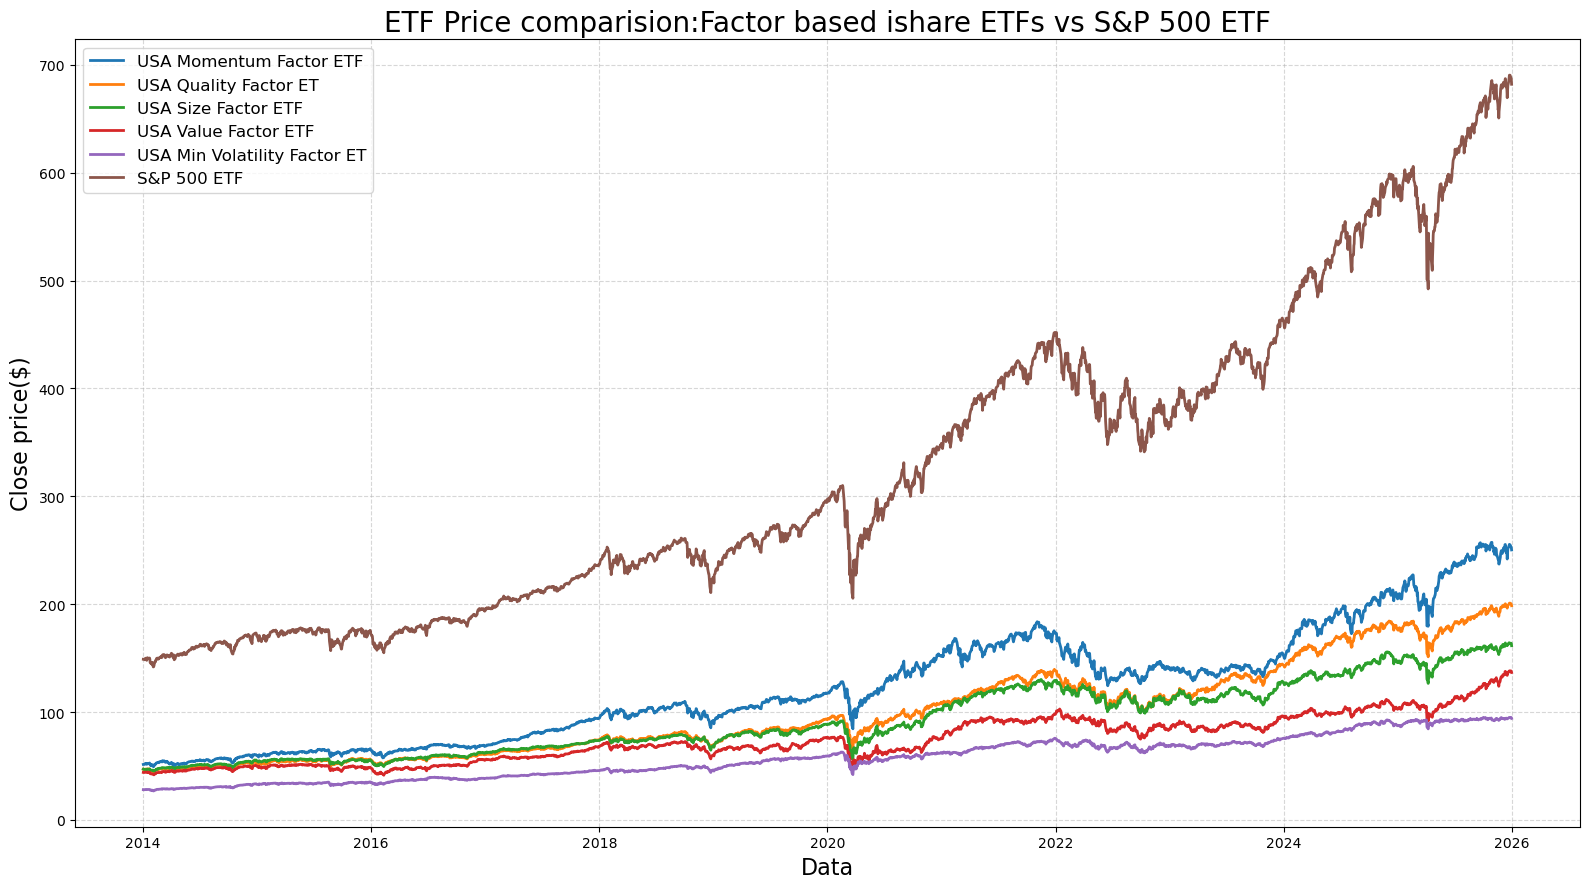

In [60]:
import matplotlib.pyplot as plt

#create a larger picture
plt.figure(figsize=(16,9))
#'MTUM','QUAL','SIZE','VLUE','USMV'
#MTUM – iShares MSCI USA Momentum Factor ETF
#QUAL – iShares MSCI USA Quality Factor ETF
#SIZE – iShares MSCI USA Size Factor ETF
#VLUE – iShares MSCI USA Value Factor ETF
#USMV – iShares MSCI USA Min Volatility Factor ET
#SPY - S&P 500 ETF

#plot each stock
plt.plot(data.index, data['MTUM'],label='USA Momentum Factor ETF', linewidth = 2)
plt.plot(data.index, data['QUAL'],label='USA Quality Factor ET', linewidth = 2)
plt.plot(data.index, data['SIZE'],label='USA Size Factor ETF', linewidth = 2)
plt.plot(data.index, data['VLUE'],label='USA Value Factor ETF', linewidth = 2)
plt.plot(data.index, data['USMV'],label='USA Min Volatility Factor ET', linewidth = 2)
plt.plot(data.index, data['SPY'],label='S&P 500 ETF', linewidth = 2)

#TITLE, label for X&Y axis
plt.title('ETF Price comparision:Factor based ishare ETFs vs S&P 500 ETF',fontsize=20)
plt.xlabel('Data',fontsize=16)
plt.ylabel('Close price($)',fontsize=16)

#add grid lines for readability
plt.grid(True, linestyle='--',alpha=0.5)

#customize legend
plt.legend(fontsize=12, loc='upper left')

#show the plot
plt.tight_layout()
plt.show()

In [45]:
import pandas as pd

data.index = pd.to_datetime(data.index)

In [46]:
monthly_prices = data.resample('M').last() - resample creates month end data
monthly_prices.head()

C:\Users\PVBG\AppData\Local\Temp\ipykernel_24624\3775465948.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = data.resample('M').last()


Ticker,MTUM,QUAL,SIZE,SPY,USMV,VLUE
Date,,,,,,
2014-01-31,50.865879,45.389217,46.182064,145.125366,27.526255,42.748844
2014-02-28,54.283554,47.610481,48.065380,151.730865,28.733820,44.446308
2014-03-31,52.427708,47.387310,48.716713,152.989532,28.977192,45.292229
2014-04-30,51.906387,47.740620,48.922337,154.053040,29.363008,45.658741
2014-05-31,54.017742,48.851059,50.040936,157.628067,29.700607,46.361889


In [49]:
monthly_prices.index.min(), monthly_prices.index.max()
len(monthly_prices)
monthly_prices.tail()



Ticker,MTUM,QUAL,SIZE,SPY,USMV,VLUE
Date,,,,,,
2025-08-31,242.494858,187.910370,158.461914,641.371399,93.509026,118.324539
2025-09-30,255.757095,193.904877,160.037292,664.217285,94.747475,124.307755
2025-10-31,253.533112,195.699371,159.848160,680.050537,92.795563,129.635941
2025-11-30,249.573837,197.473923,161.102356,681.376587,94.936691,132.876587
2025-12-31,250.309998,198.619995,161.570007,681.919983,94.160004,136.729996


In [50]:
monthly_returns = monthly_prices.pct_change().dropna()
monthly_returns.head()

Ticker,MTUM,QUAL,SIZE,SPY,USMV,VLUE
Date,,,,,,
2014-02-28,0.067190,0.048938,0.040780,0.045516,0.043870,0.039708
2014-03-31,-0.034188,-0.004687,0.013551,0.008295,0.008470,0.019032
2014-04-30,-0.009944,0.007456,0.004221,0.006952,0.013314,0.008092
2014-05-31,0.040676,0.023260,0.022865,0.023206,0.011497,0.015400
2014-06-30,0.020720,0.005885,0.021718,0.020645,0.012443,0.026187


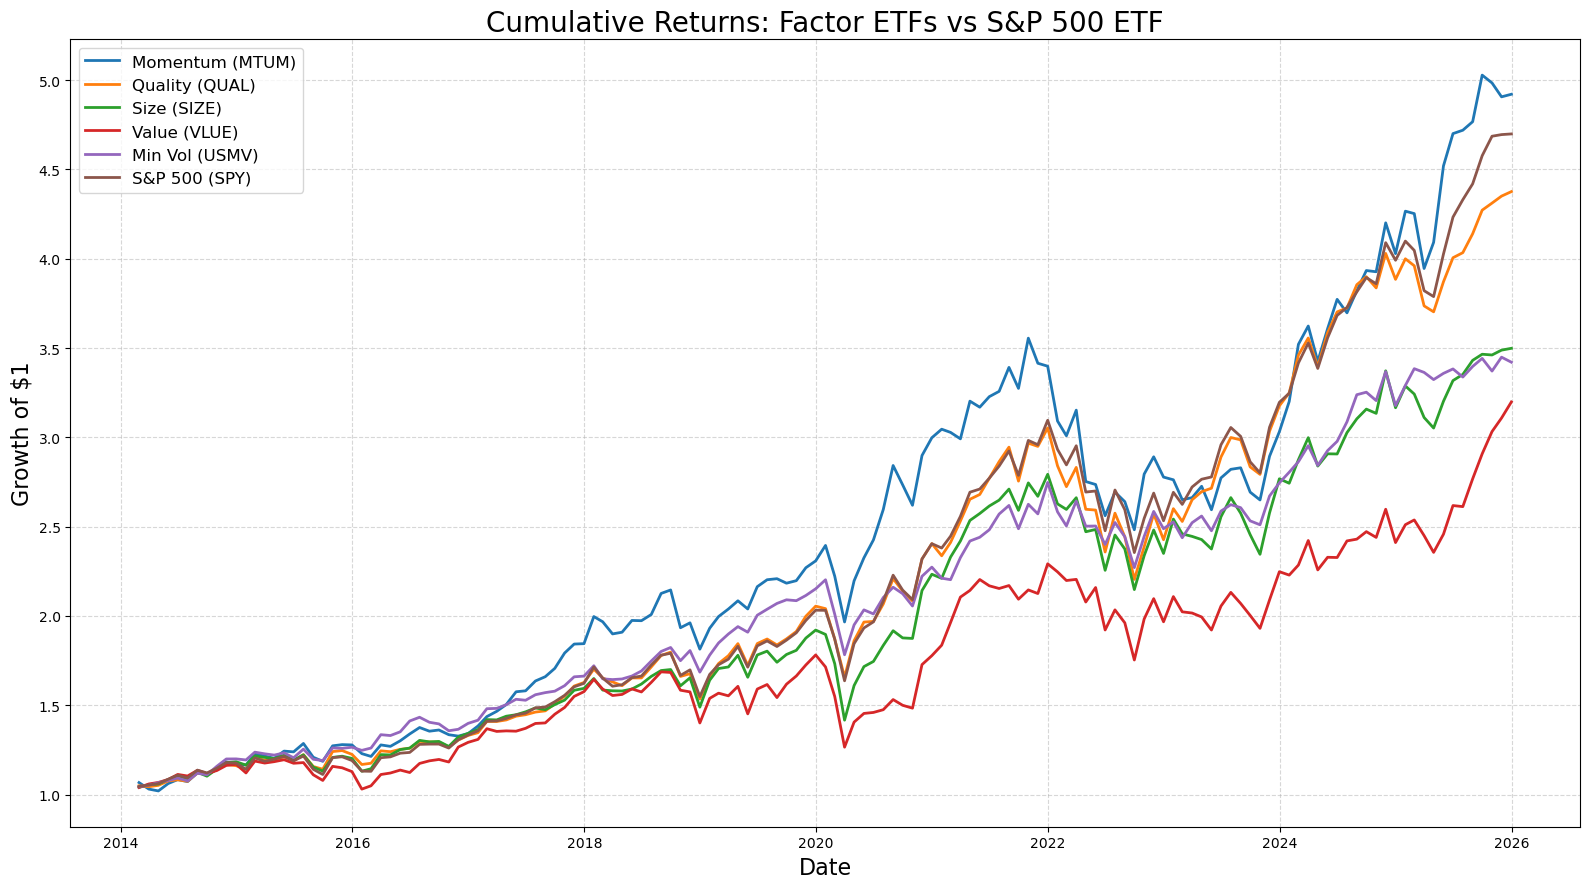

In [61]:
import matplotlib.pyplot as plt

# Convert monthly returns to cumulative returns
cumulative_returns = (1 + monthly_returns).cumprod()

plt.figure(figsize=(16,9))

plt.plot(cumulative_returns.index, cumulative_returns['MTUM'], label='Momentum (MTUM)', linewidth=2)
plt.plot(cumulative_returns.index, cumulative_returns['QUAL'], label='Quality (QUAL)', linewidth=2)
plt.plot(cumulative_returns.index, cumulative_returns['SIZE'], label='Size (SIZE)', linewidth=2)
plt.plot(cumulative_returns.index, cumulative_returns['VLUE'], label='Value (VLUE)', linewidth=2)
plt.plot(cumulative_returns.index, cumulative_returns['USMV'], label='Min Vol (USMV)', linewidth=2)
plt.plot(cumulative_returns.index, cumulative_returns['SPY'], label='S&P 500 (SPY)', linewidth=2)

plt.title('Cumulative Returns: Factor ETFs vs S&P 500 ETF', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Growth of $1', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [62]:
import numpy as np
from scipy.optimize import minimize

In [66]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])  # 5 ETFs
mean_returns = monthly_returns[['MTUM','QUAL','SIZE','VLUE','USMV']].mean() #average monthly return of each ETF
cov_matrix = monthly_returns[['MTUM','QUAL','SIZE','VLUE','USMV']].cov() #risk & correlation between ETFs
ret, vol = portfolio_performance(weights, mean_returns, cov_matrix)
print("Expected monthly return:", ret) #ret → expected portfolio monthly return
print("Expected monthly volatility:", vol) #vol → expected portfolio monthly volatility


Expected monthly return: 0.010372328328505346
Expected monthly volatility: 0.040433241426917406


In [68]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Download ETFs and SPY
tickers = ['MTUM','QUAL','SIZE','VLUE','USMV','SPY']

data = yf.download(tickers, start='2014-01-01', end='2026-01-01', progress=False)['Close']

# Ensure datetime index
data.index = pd.to_datetime(data.index)

# Drop missing values
data = data.dropna()

data.head()


Ticker,MTUM,QUAL,SIZE,SPY,USMV,VLUE
Date,,,,,,
2014-01-02,51.533806,47.023724,47.099167,148.986053,28.110037,44.081497
2014-01-03,51.620533,46.931534,46.845325,148.961639,28.102043,44.029385
2014-01-06,51.507782,46.747116,46.845325,148.529892,28.038073,44.021938
2014-01-07,51.932819,47.124329,46.853508,149.442108,28.198011,44.267620
2014-01-08,52.314487,47.107552,46.853508,149.474747,28.190010,44.267620


In [69]:
# Resample to month-end prices
monthly_prices = data.resample('M').last()

# Calculate monthly returns
monthly_returns = monthly_prices.pct_change().dropna()

monthly_returns.head()


C:\Users\PVBG\AppData\Local\Temp\ipykernel_24624\216194424.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = data.resample('M').last()


Ticker,MTUM,QUAL,SIZE,SPY,USMV,VLUE
Date,,,,,,
2014-02-28,0.067190,0.048938,0.040780,0.045516,0.043870,0.039708
2014-03-31,-0.034188,-0.004687,0.013551,0.008295,0.008470,0.019032
2014-04-30,-0.009944,0.007456,0.004221,0.006952,0.013314,0.008092
2014-05-31,0.040676,0.023260,0.022865,0.023206,0.011497,0.015400
2014-06-30,0.020720,0.005885,0.021718,0.020645,0.012443,0.026187


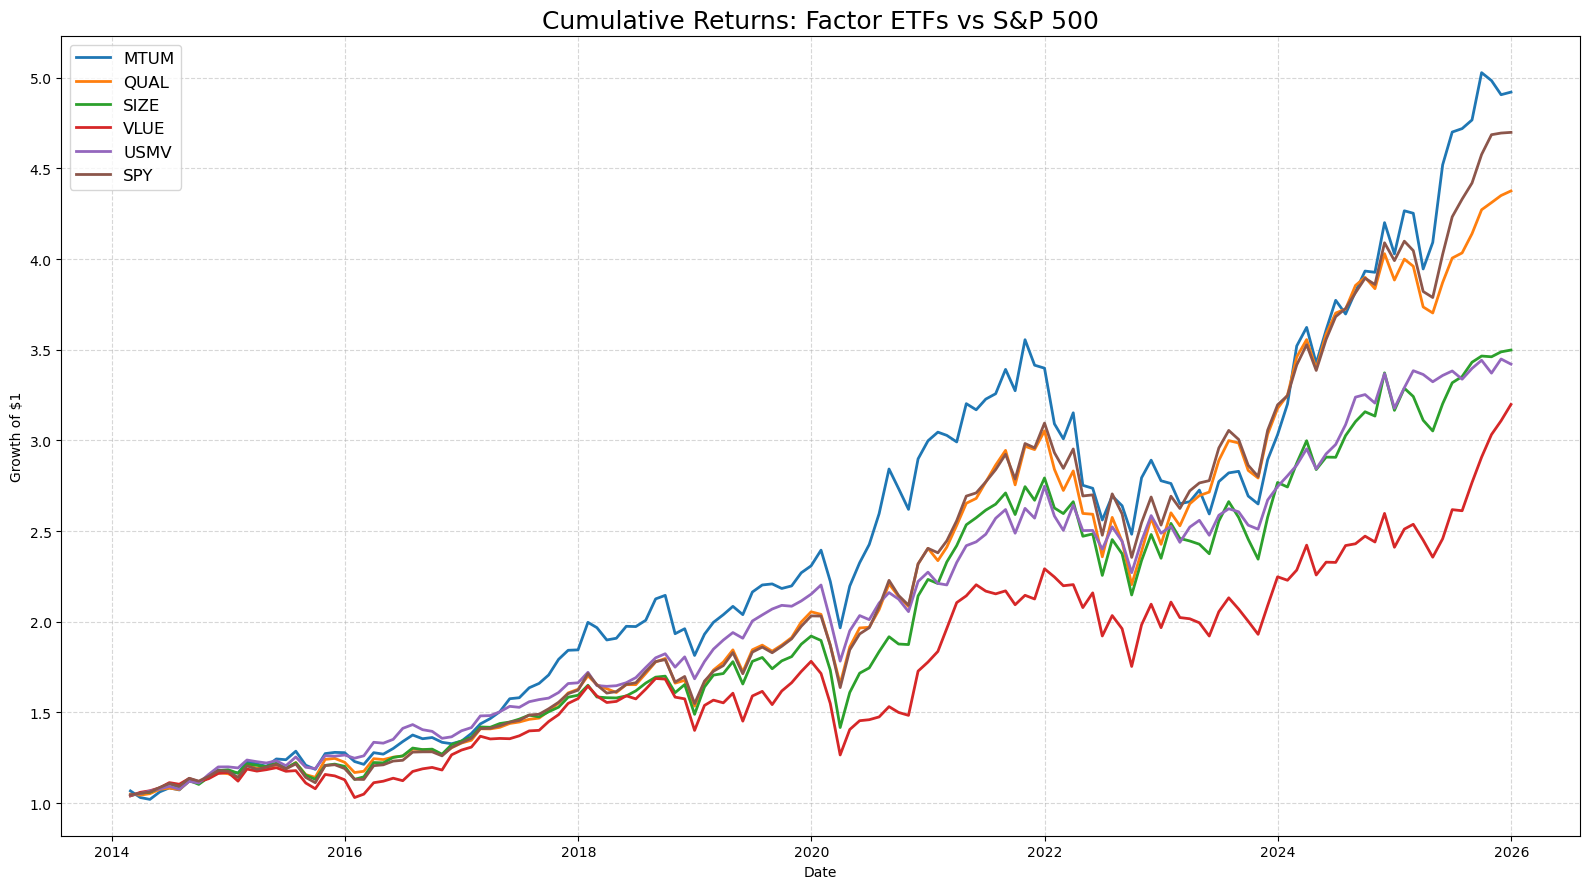

In [70]:
# Cumulative returns for visualization
cumulative_returns = (1 + monthly_returns).cumprod()

plt.figure(figsize=(16,9))
for ticker in tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker, linewidth=2)

plt.title('Cumulative Returns: Factor ETFs vs S&P 500', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [72]:
# List of 5 factor ETFs (exclude SPY for weights)
etf_list = ['MTUM','QUAL','SIZE','VLUE','USMV']

# Lookback window in months
lookback = 36  # 3 years

# Portfolio functions
def portfolio_performance(weights, mean_returns, cov_matrix):
    port_ret = np.dot(weights, mean_returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_ret, port_vol

def negative_sharpe(weights, mean_returns, cov_matrix):
    ret, vol = portfolio_performance(weights, mean_returns, cov_matrix)
    return -ret / vol  # negative for maximization

# Constraints and bounds
n_assets = len(etf_list)
bounds = tuple((0,1) for _ in range(n_assets))
constraints = ({'type':'eq', 'fun': lambda w: np.sum(w)-1})
initial_weights = np.array(n_assets * [1/n_assets])

# ✅ Test: Print starting weights & number of assets
print("Optimizer setup complete")
print("Number of assets:", n_assets)
print("Initial equal weights:", initial_weights)


Optimizer setup complete
Number of assets: 5
Initial equal weights: [0.2 0.2 0.2 0.2 0.2]


In [102]:
# Set lookback period to 1 month
lookback = 1  # ONLY past 3 month used for optimization

weights_list = []
rebalance_dates = []

for i in range(lookback, len(monthly_returns)):
    # Use past 1 month
    window_returns = monthly_returns[etf_list].iloc[i-lookback:i]

    # Estimate mean & covariance
    mean_ret = window_returns.mean()
    cov_mat = window_returns.cov()

    # Optimize weights for max Sharpe ratio
    result = minimize(
        negative_sharpe,
        initial_weights,          # start with equal weights
        args=(mean_ret, cov_mat),
        method='SLSQP',
        bounds=bounds,            # 0 <= weight <= 1
        constraints=constraints   # sum(weights) = 1
    )

    # Store results
    weights_list.append(result.x)
    rebalance_dates.append(monthly_returns.index[i])

# Convert to DataFrame
weights_df = pd.DataFrame(weights_list, index=rebalance_dates, columns=etf_list)

# Display first 5 months
weights_df.head()



C:\Users\PVBG\anaconda3\Lib\site-packages\pandas\core\frame.py:11238: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\PVBG\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\PVBG\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\PVBG\anaconda3\Lib\site-packages\pandas\core\frame.py:11238: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\PVBG\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\PVBG\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\PVBG\anaconda

,MTUM,QUAL,SIZE,VLUE,USMV
2014-03-31,0.2,0.2,0.2,0.2,0.2
2014-04-30,0.2,0.2,0.2,0.2,0.2
2014-05-31,0.2,0.2,0.2,0.2,0.2
2014-06-30,0.2,0.2,0.2,0.2,0.2
2014-07-31,0.2,0.2,0.2,0.2,0.2


In [103]:
# Shift weights by 1 month to avoid look-ahead bias
portfolio_returns = (weights_df.shift(1) * monthly_returns.loc[weights_df.index, etf_list]).sum(axis=1)
portfolio_returns.head()


2014-03-31    0.000000
2014-04-30    0.004628
2014-05-31    0.022740
2014-06-30    0.017390
2014-07-31   -0.011647
dtype: float64

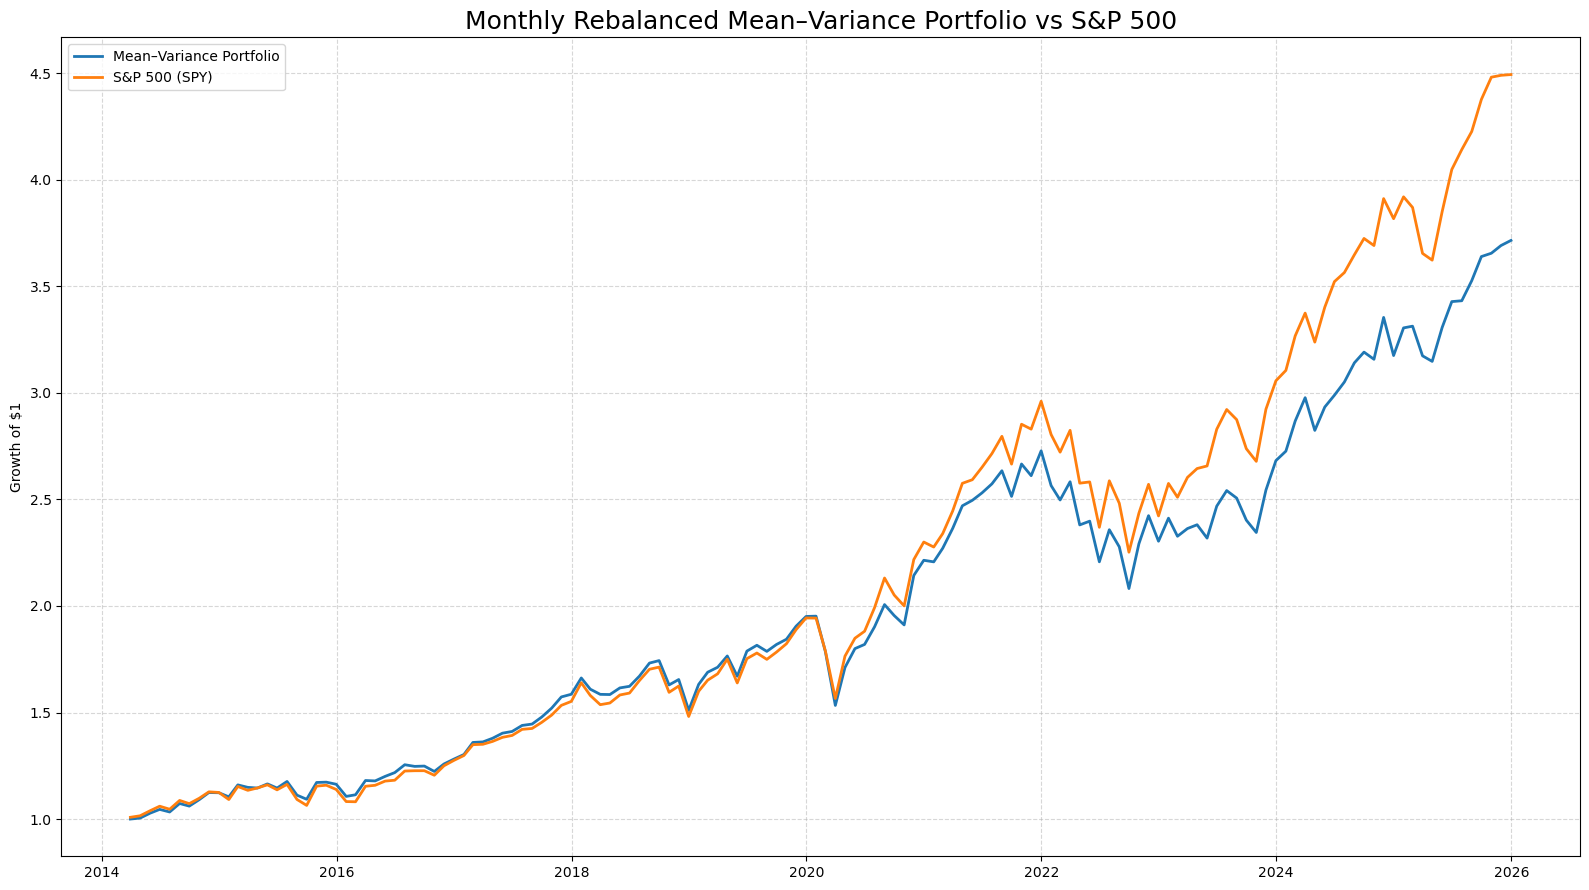

In [104]:
# Cumulative returns
portfolio_cum = (1 + portfolio_returns).cumprod()
spy_cum = (1 + monthly_returns['SPY'].loc[weights_df.index]).cumprod()

plt.figure(figsize=(16,9))
plt.plot(portfolio_cum, label='Mean–Variance Portfolio', linewidth=2)
plt.plot(spy_cum, label='S&P 500 (SPY)', linewidth=2)
plt.title('Monthly Rebalanced Mean–Variance Portfolio vs S&P 500', fontsize=18)
plt.ylabel('Growth of $1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [105]:
def performance_stats(returns):
    cagr = (1 + returns).prod()**(12/len(returns)) - 1
    vol = returns.std() * np.sqrt(12)
    sharpe = cagr / vol
    max_dd = (1 + returns).cumprod().div((1 + returns).cumprod().cummax()).min() - 1
    return cagr, vol, sharpe, max_dd

stats = performance_stats(portfolio_returns)
print("Mean–Variance Portfolio Performance:")
print("CAGR:", round(stats[0]*100,2), "%")
print("Volatility:", round(stats[1]*100,2), "%")
print("Sharpe Ratio:", round(stats[2],2))
print("Max Drawdown:", round(stats[3]*100,2), "%")


Mean–Variance Portfolio Performance:
CAGR: 11.73 %
Volatility: 14.01 %
Sharpe Ratio: 0.84
Max Drawdown: -23.69 %


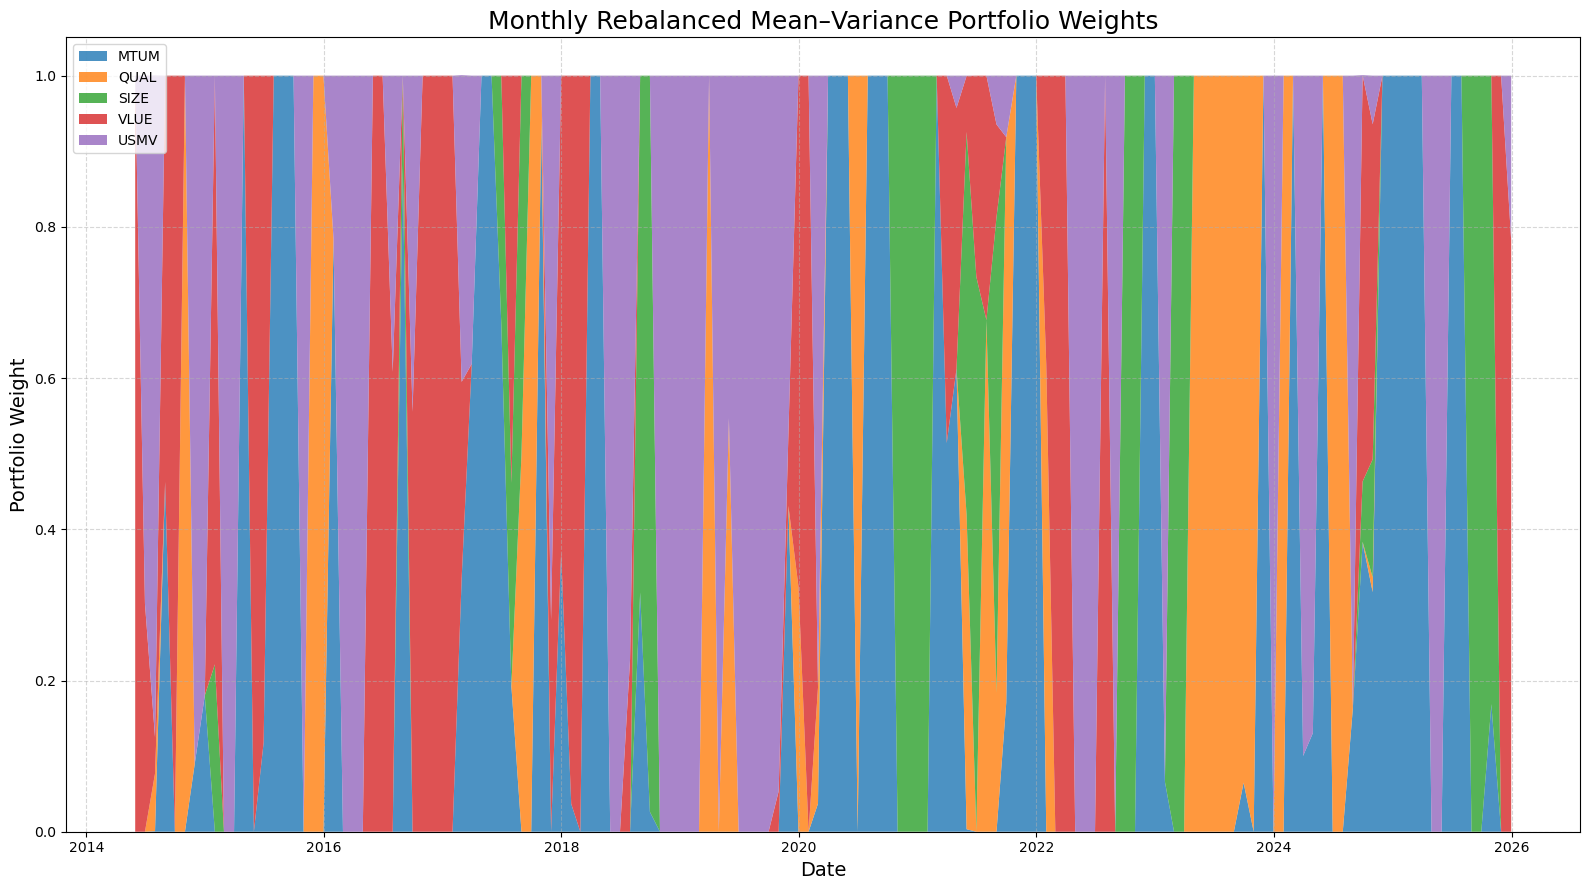

In [85]:
import matplotlib.pyplot as plt

# Ensure weights_df exists from Step 5
# weights_df.index = rebalance dates
# weights_df.columns = ETF names

plt.figure(figsize=(16,9))

# Stacked area chart
plt.stackplot(
    weights_df.index,
    weights_df['MTUM'],
    weights_df['QUAL'],
    weights_df['SIZE'],
    weights_df['VLUE'],
    weights_df['USMV'],
    labels=weights_df.columns,
    alpha=0.8
)

plt.title('Monthly Rebalanced Mean–Variance Portfolio Weights', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Portfolio Weight', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [95]:
# List of 5 factor ETFs (exclude SPY for weights)
etf_list = ['MTUM','QUAL','SIZE','VLUE','USMV']

# Lookback window in months
lookback = 36  # 3 years

# Portfolio functions
def portfolio_performance(weights, mean_returns, cov_matrix):
    port_ret = np.dot(weights, mean_returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_ret, port_vol

def negative_sharpe(weights, mean_returns, cov_matrix):
    ret, vol = portfolio_performance(weights, mean_returns, cov_matrix)
    return -ret / vol  # negative for maximization

# Constraints and bounds
n_assets = len(etf_list)
bounds = tuple((0,1) for _ in range(n_assets))
constraints = ({'type':'eq', 'fun': lambda w: np.sum(w)-1})
initial_weights = np.array(n_assets * [1/n_assets])

# ✅ Test: Print starting weights & number of assets
print("Optimizer setup complete")
print("Number of assets:", n_assets)
print("Initial equal weights:", initial_weights)

Optimizer setup complete
Number of assets: 5
Initial equal weights: [0.2 0.2 0.2 0.2 0.2]


In [97]:
# Set lookback period to 1 month
lookback = 36  # ONLY past 3 month used for optimization

weights_list = []
rebalance_dates = []

for i in range(lookback, len(monthly_returns)):
    # Use past 1 month
    window_returns = monthly_returns[etf_list].iloc[i-lookback:i]

    # Estimate mean & covariance
    mean_ret = window_returns.mean()
    cov_mat = window_returns.cov()

    # Optimize weights for max Sharpe ratio
    result = minimize(
        negative_sharpe,
        initial_weights,          # start with equal weights
        args=(mean_ret, cov_mat),
        method='SLSQP',
        bounds=bounds,            # 0 <= weight <= 1
        constraints=constraints   # sum(weights) = 1
    )

    # Store results
    weights_list.append(result.x)
    rebalance_dates.append(monthly_returns.index[i])

# Convert to DataFrame
weights_df = pd.DataFrame(weights_list, index=rebalance_dates, columns=etf_list)

# Display first 5 months
weights_df.head()


,MTUM,QUAL,SIZE,VLUE,USMV
2017-02-28,0.000000e+00,0.000000e+00,0.000000e+00,5.422688e-17,1.000000
2017-03-31,1.387779e-17,0.000000e+00,2.775558e-17,0.000000e+00,1.000000
2017-04-30,1.423152e-01,2.415055e-16,1.612745e-16,0.000000e+00,0.857685
2017-05-31,4.654472e-01,1.707767e-17,3.962908e-17,0.000000e+00,0.534553
2017-06-30,4.129310e-01,0.000000e+00,5.793779e-18,0.000000e+00,0.587069


In [98]:
# Shift weights by 1 month to avoid look-ahead bias
portfolio_returns = (weights_df.shift(1) * monthly_returns.loc[weights_df.index, etf_list]).sum(axis=1)
portfolio_returns.head()

2017-02-28    0.000000
2017-03-31    0.001230
2017-04-30    0.014040
2017-05-31    0.023974
2017-06-30   -0.000288
dtype: float64

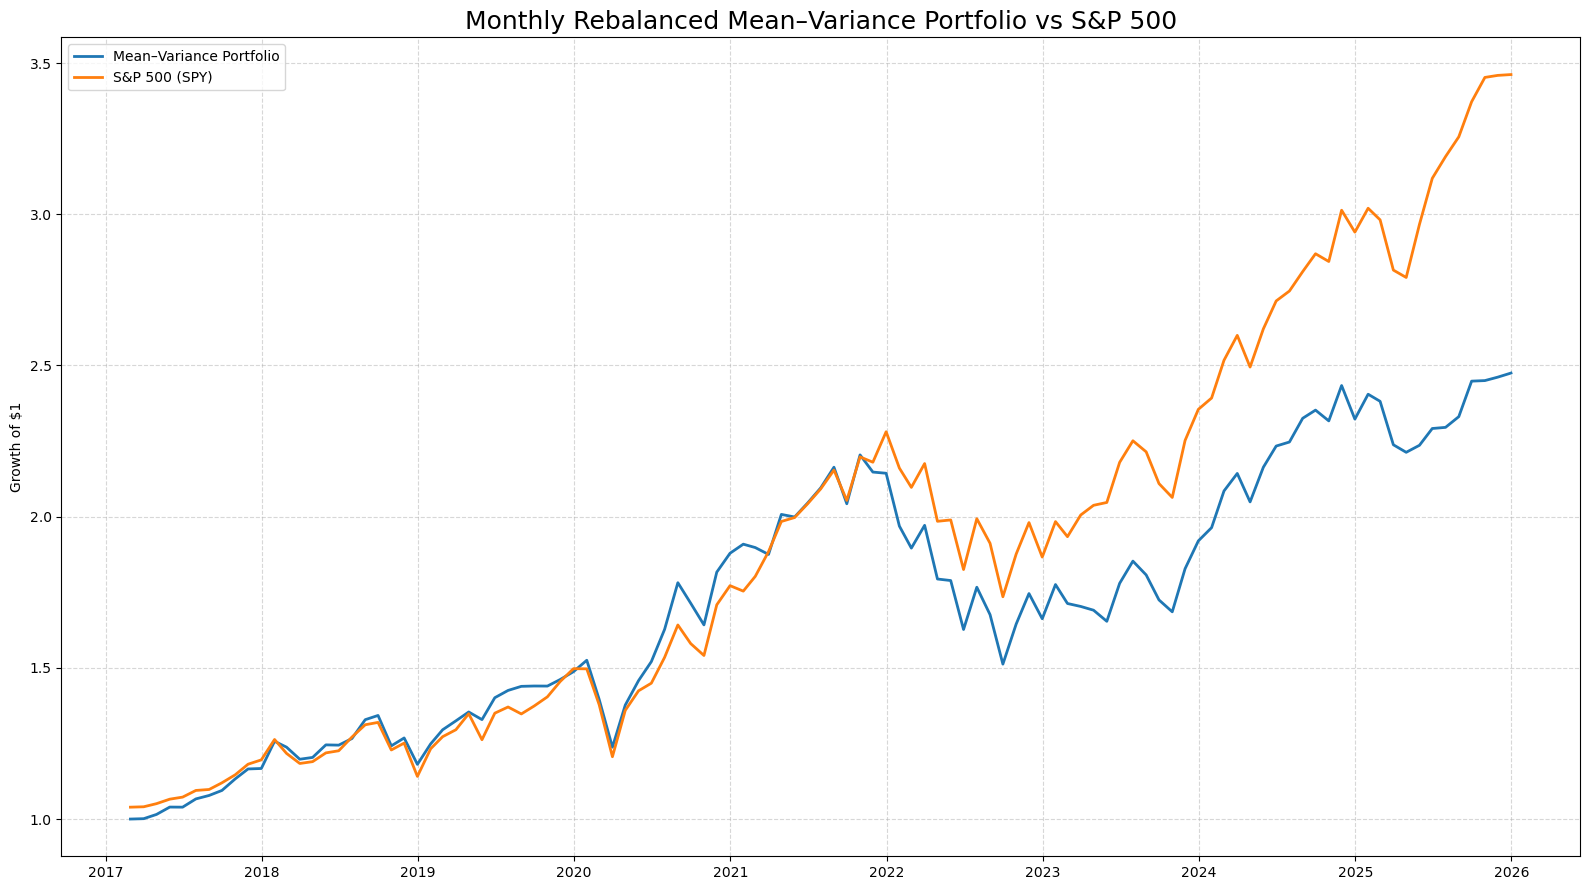

In [99]:
# Cumulative returns
portfolio_cum = (1 + portfolio_returns).cumprod()
spy_cum = (1 + monthly_returns['SPY'].loc[weights_df.index]).cumprod()

plt.figure(figsize=(16,9))
plt.plot(portfolio_cum, label='Mean–Variance Portfolio', linewidth=2)
plt.plot(spy_cum, label='S&P 500 (SPY)', linewidth=2)
plt.title('Monthly Rebalanced Mean–Variance Portfolio vs S&P 500', fontsize=18)
plt.ylabel('Growth of $1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [100]:
def performance_stats(returns):
    cagr = (1 + returns).prod()**(12/len(returns)) - 1
    vol = returns.std() * np.sqrt(12)
    sharpe = cagr / vol
    max_dd = (1 + returns).cumprod().div((1 + returns).cumprod().cummax()).min() - 1
    return cagr, vol, sharpe, max_dd

stats = performance_stats(portfolio_returns)
print("Mean–Variance Portfolio Performance:")
print("CAGR:", round(stats[0]*100,2), "%")
print("Volatility:", round(stats[1]*100,2), "%")
print("Sharpe Ratio:", round(stats[2],2))
print("Max Drawdown:", round(stats[3]*100,2), "%")

Mean–Variance Portfolio Performance:
CAGR: 10.7 %
Volatility: 15.93 %
Sharpe Ratio: 0.67
Max Drawdown: -31.39 %


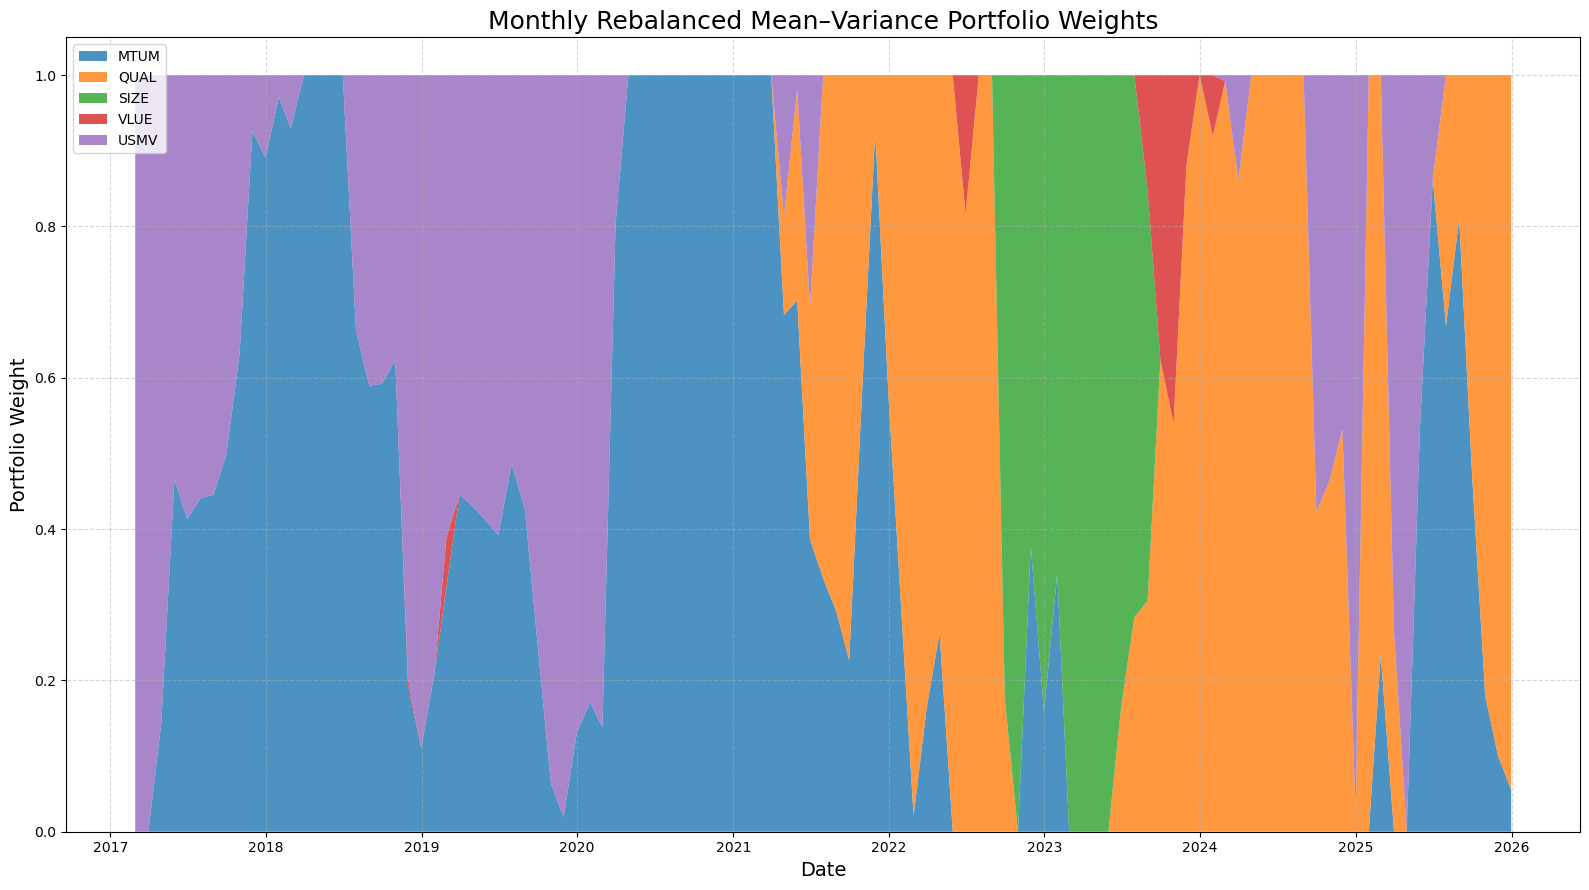

In [101]:
import matplotlib.pyplot as plt

# Ensure weights_df exists from Step 5
# weights_df.index = rebalance dates
# weights_df.columns = ETF names

plt.figure(figsize=(16,9))

# Stacked area chart
plt.stackplot(
    weights_df.index,
    weights_df['MTUM'],
    weights_df['QUAL'],
    weights_df['SIZE'],
    weights_df['VLUE'],
    weights_df['USMV'],
    labels=weights_df.columns,
    alpha=0.8
)

plt.title('Monthly Rebalanced Mean–Variance Portfolio Weights', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Portfolio Weight', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()